# INF285 - Computación Científica
# Laboratorio 1 - Contexto
## 20 de agosto de 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Errores de redondeo  

En un computador, los números reales se representan con **precisión finita** (p. ej., doble precisión IEEE-754). Muchos valores deben aproximarse al representable más cercano, y la diferencia entre el valor real y el almacenado es el **error de redondeo**.

Un ejemplo clásico es $\pi$:

$$
\pi = 3.14159265358979323846\ldots \quad \Rightarrow \quad \hat{\pi}\approx 3.141592653589793
$$  

Aquí, la diferencia $\pi - \hat{\pi}$ es muy pequeña, pero no desaparece.  

Cuando realizamos operaciones aritméticas, estos errores se **propagan**. En algunos casos se amplifican y generan resultados inestables.





## Algoritmo 1


Consideremos la función

$$
f(x) = \frac{e^x - 1}{x},
$$

El enfoque directo para evaluar $ f(x) $ es:

$$
f(x) =
\begin{cases}
1, & x = 0, \\
\dfrac{e^x - 1}{x}, & x \neq 0.
\end{cases}
$$

El pseudocódigo es:

```python
y = exp(x)
if x == 0
    f = 1
else
    f = (exp(x) - 1) / x
end
```

Sin embargo, cuando $ |x| \ll 1 $, la resta $ e^x - 1 $ sufre de **cancelación catastrófica**, pues ambos términos son cercanos y se pierde precisión significativa.  
Esto provoca que los resultados sean **inexactos para valores pequeños de $ x $**.

---

In [2]:
x_vals = np.logspace(-64, -1, num=20, base=2.)
k_vals = -np.log2(x_vals)

# Algoritmo 1
def algoritmo1(x):
    if x == 0.0:
        return 1.0
    else:
        return (np.exp(x) - 1.0) / x

algoritmo1_vec = np.vectorize(algoritmo1)
alg1_vals = algoritmo1_vec(x_vals)


## Algoritmo 2

Una alternativa es reescribir la expresión usando logaritmos:

$
f(x) = \frac{y - 1}{\log(y)}, \, \text{ donde } y = e^x.
$

El pseudocódigo es:

```python
y = exp(x)
if y == 1
    f = 1
else
    f = (y - 1) / log(y)
end
```
---
Al reescribir la función en términos de logaritmos, se evita la resta entre números casi iguales que arruinaba la estabilidad del Algoritmo 1. En este caso, el cálculo de $(y-1)/\log(y)$ resulta mucho más estable numéricamente cuando $y$ está cercano a 1, lo que corresponde precisamente a los valores de $x$ pequeños.


In [3]:
# Algoritmo 2
def algoritmo2(x):
    y = np.exp(x)
    if y==1.0:
        return 1.0
    else:
        return (y - 1.0) / np.log(y)
    
algoritmo2_vec = np.vectorize(algoritmo2)
alg2_vals = algoritmo2_vec(x_vals)

### A continuación Se observa la comparacion de los resultados de cada algoritmo:

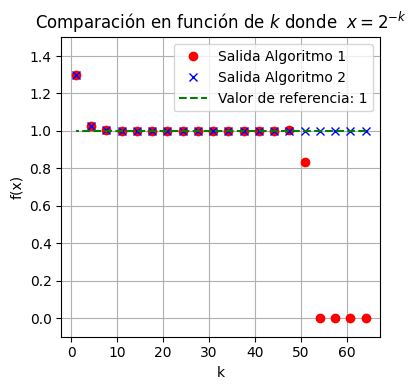

In [4]:

plt.figure(figsize=(4, 4))
plt.plot(k_vals, alg1_vals,"ro", label='Salida Algoritmo 1')
plt.plot(k_vals, alg2_vals,"bx", label='Salida Algoritmo 2')
plt.plot(k_vals, np.ones_like(k_vals), 'g--', label='Valor de referencia: 1')
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title(r"Comparación en función de $k$ donde  $x = 2^{-k}$")
plt.legend()
plt.ylim(-0.1, 1.5)
plt.grid(True)
plt.tight_layout()
plt.show()

### Además del grafico de comparación de errores asociados a cada algoritmo:

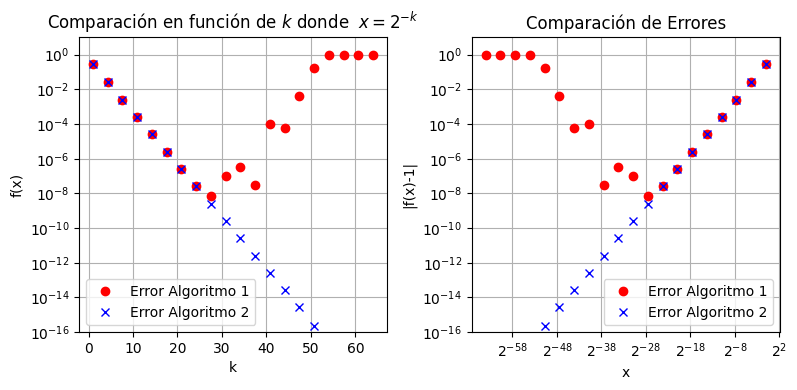

In [5]:

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.semilogy(k_vals, np.abs(alg1_vals-1.0),"ro", label='Error Algoritmo 1')
plt.semilogy(k_vals, np.abs(alg2_vals-1.0),"bx", label='Error Algoritmo 2')
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title(r"Comparación en función de $k$ donde  $x = 2^{-k}$")
plt.legend()
plt.ylim(1e-16, 1e1)
plt.grid(True)

plt.subplot(122)
plt.loglog(x_vals, np.abs(alg1_vals-1.0),"ro", label='Error Algoritmo 1')
plt.loglog(x_vals, np.abs(alg2_vals-1.0),"bx", label='Error Algoritmo 2')
plt.xscale('log',base=2)
plt.xlabel("x")
plt.ylabel("|f(x)-1|")
plt.title("Comparación de Errores")
plt.legend()
plt.grid(True)
plt.ylim(1e-16, 1e1)

plt.tight_layout()
plt.show()

Se observa cómo se comporta el Algoritmo 1 al evaluar la función para valores de la forma $x = 2^{-k}$. El valor de referencia es siempre 1, indicado por la línea horizontal, mientras que los puntos corresponden a los resultados numéricos obtenidos.  

Cuando $x$ toma valores moderados, los cálculos siguen de cerca el valor esperado y la aproximación funciona bien. No obstante, al reducir $x$ de manera progresiva, los errores de redondeo se hacen evidentes y la cancelación en la resta $e^x-1$ comienza a dominar. El efecto es notorio en la parte final del gráfico, donde los resultados caen abruptamente hacia cero en lugar de permanecer cercanos a 1.  

Este comportamiento confirma lo anticipado: el enfoque directo deja de ser confiable para números muy pequeños, pues la pérdida de cifras significativas degrada la precisión del algoritmo.  


Para el Algoritmo 2

Las figuras confirman esta mejora. Aun cuando $x$ se reduce a magnitudes extremadamente pequeñas, los resultados permanecen cercanos al valor de referencia igual a 1. Solo se aprecia un desajuste para valores muy grandes de $x$, donde la aproximación no es tan exacta, pero en la región crítica —cuando $|x|\ll 1$— el algoritmo 2 conserva la precisión.  

En otras palabras, la reformulación elimina la cancelación catastrófica y permite que el cálculo sea confiable incluso en condiciones donde el enfoque directo fallaba.  


## Serie de Taylor alrededor de $x = 0$

La expansión de $ f(x) = \frac{e^x - 1}{x} $ es:

$
f(x) = \frac{e^x - 1}{x}
= 1 + \frac{x}{2} + \frac{x^2}{6} + \frac{x^3}{24} + \frac{x^4}{120} + \cdots
$

En forma general:

$
f(x) = \sum_{i=0}^{\infty} \frac{x^i}{(i+1)!}.
$

Esto muestra que:

$
\lim_{x \to 0} f(x) = 1,
$

y explica por qué, para valores pequeños de $x$, conviene utilizar formulaciones alternativas (como el **Algoritmo 2**) que eviten restar números casi iguales y reduzcan la cancelación catastrófica.


In [6]:
def taylor_trunc(x, n):
  den = 1.0
  num = 1.0
  s = 1.0
  for i in np.arange(1,n+1):
    num = num*x
    den = den*i
    s += num/den
  return s
  
def alg1_with_Taylor(x,n,delta):
  if np.abs(x)>delta:
    return algoritmo1(x)
  else:
    return taylor_trunc(x,n)

delta = np.power(2.0, -5)
alg1_with_Taylor_vec = np.vectorize(alg1_with_Taylor, excluded=['n', 'delta'])
alg1_with_Taylor_vals = alg1_with_Taylor_vec(x_vals, n=5, delta=delta)


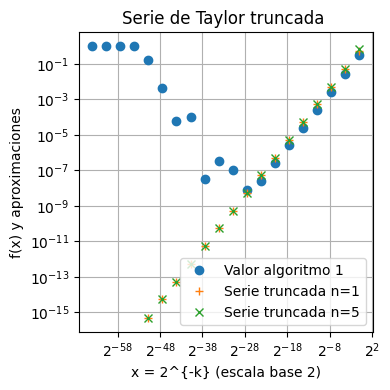

In [7]:
# Gráfico 1 (valores vs algoritmo 1)
plt.figure(figsize=(4, 4))
plt.semilogy(x_vals, np.abs(algoritmo1_vec(x_vals)-1.0), 'o' ,label='Valor algoritmo 1')
# for n in orders_main:
plt.semilogy(x_vals, np.abs(taylor_trunc(x_vals, 1)-1.0), '+',label=f'Serie truncada n={1}')
plt.semilogy(x_vals, np.abs(taylor_trunc(x_vals, 5)-1.0), 'x',label=f'Serie truncada n={5}')
plt.xscale('log', base=2)

plt.xlabel("x = 2^{-k} (escala base 2)")
plt.ylabel("f(x) y aproximaciones")
plt.title("Serie de Taylor truncada ")
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

### Como se observa en el grafico anterior, no hay una diferencia significativa al momento de truncar en diferentes terminos la serie, dado que se estan añadiendo resultados cada vez mas pequeños a esta misma.

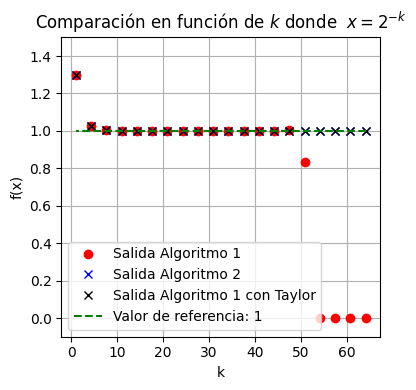

In [8]:
plt.figure(figsize=(4, 4))
plt.plot(k_vals, alg1_vals,"ro", label='Salida Algoritmo 1')
plt.plot(k_vals, alg2_vals,"bx", label='Salida Algoritmo 2')
plt.plot(k_vals, alg1_with_Taylor_vals,"kx", label='Salida Algoritmo 1 con Taylor')
plt.plot(k_vals, np.ones_like(k_vals), 'g--', label='Valor de referencia: 1')
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title(r"Comparación en función de $k$ donde  $x = 2^{-k}$")
plt.legend()
plt.ylim(-0.1, 1.5)
plt.grid(True)
plt.tight_layout()
plt.show()

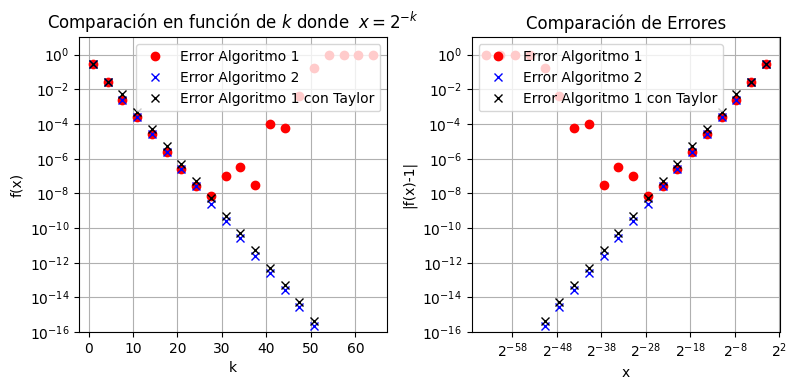

In [9]:
# Figura 1: Algoritmo 1
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.semilogy(k_vals, np.abs(alg1_vals-1.0),"ro", label='Error Algoritmo 1')
plt.semilogy(k_vals, np.abs(alg2_vals-1.0),"bx", label='Error Algoritmo 2')
plt.semilogy(k_vals, np.abs(alg1_with_Taylor_vals-1.0),"kx", label='Error Algoritmo 1 con Taylor')
plt.xlabel("k")
plt.ylabel("f(x)")
plt.title(r"Comparación en función de $k$ donde  $x = 2^{-k}$")
plt.legend()
plt.ylim(1e-16, 1e1)
plt.grid(True)

plt.subplot(122)
plt.loglog(x_vals, np.abs(alg1_vals-1.0),"ro", label='Error Algoritmo 1')
plt.loglog(x_vals, np.abs(alg2_vals-1.0),"bx", label='Error Algoritmo 2')
plt.loglog(x_vals, np.abs(alg1_with_Taylor_vals-1.0),"kx", label='Error Algoritmo 1 con Taylor')
plt.xscale('log',base=2)
plt.xlabel("x")
plt.ylabel("|f(x)-1|")
plt.title("Comparación de Errores")
plt.legend()
plt.grid(True)
plt.ylim(1e-16, 1e1)

plt.tight_layout()
plt.show()

Para $x=2^{-k}$, la serie truncada con pocos términos ya aproxima bien a $f(x)$ cuando $x$ es moderado. Sin embargo, al ir a $x$ muy pequeños el valor “Algoritmo 1” se desploma: la resta $e^x-1$ cancela cifras significativas y el resultado queda dominado por error de redondeo. La serie, en cambio, mantiene el valor correcto cercano a 1.

El error de la serie truncada frente al **Algoritmo 1** decrece como una potencia de $x$ mientras el algoritmo directo sigue siendo fiable. Cuando $x$ es muy chico, el directo colapsa y el error aparente “explota”, no porque la serie falle, sino porque la referencia dejó de ser válida.
Con la reformulación $\frac{(y-1)}{\log y}$ se elimina la cancelación catastrófica. En el gráfico, incluso para $x$ extremadamente pequeños, las curvas de la serie truncada y del **Algoritmo 2** permanecen pegadas a 1, mostrando la estabilidad numérica del método.

En este caso, el error de la serie truncada cae linealmente en la escala log–log conforme $x$ disminuye, como predice la teoría: truncar en el término $\frac{x^n}{(n+1)!}$ genera un error de orden $\mathcal{O}(x^{n+1})$. La curva alcanza finalmente el límite de precisión de la máquina ($\approx 2^{-50}$), donde ya no es posible mejorar.

## Se recomienda revisar el jupyter notebook adjunto en el siguiente enlace para entender de mejor manera la perdida de importancia:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tclaudioe/Scientific-Computing-V3/blob/main/Bonus%20-%20current/Bonus%20-%2000%20-%20Playing%20with%20Julia.ipynb)